# performance check

max arduino interval: 6, min: 5
max psychopy transmit interval: 11.2837, min: 0.0509
mean flip time: 16.6667, min: 5.4155, max: 27.8427


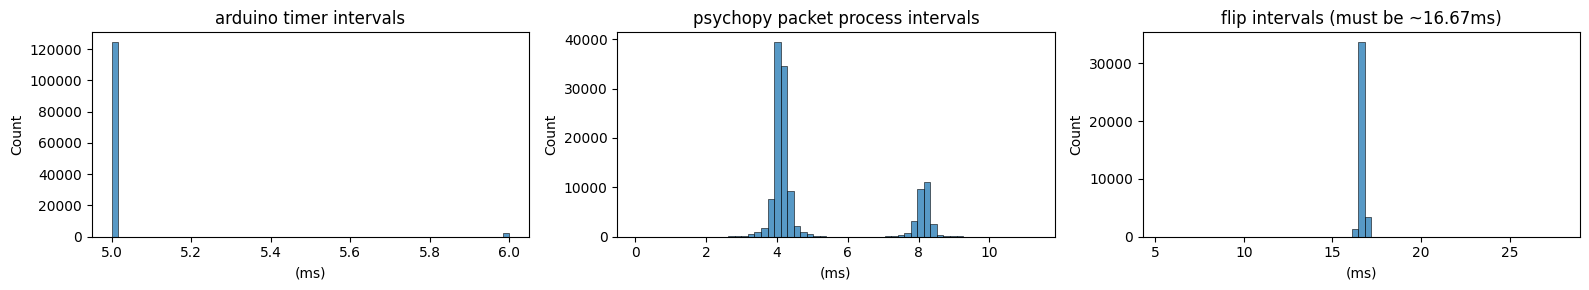

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

D = pd.read_csv('.././projects/finger_individuation/data/FingIndiv_s101_01_20250829_135546.csv')
debug = pd.read_csv('.././projects/finger_individuation/data/debug_s101_01_20250829_135547.csv')

# time sent by arduino
arduino_time = D.arduino_time.values
arduino_intervals = np.diff(arduino_time)
arduino_intervals[arduino_intervals>3000] = 5
print(f'max arduino interval: {np.max(arduino_intervals)}, min: {np.min(arduino_intervals)}')

# psychopy time at processing the packet
psy_time = D.psychopy_time.values
psy_intervals = np.diff(psy_time)*1000  # convert to ms
psy_intervals[psy_intervals>1000] = 5
print(f'max psychopy transmit interval: {np.max(psy_intervals):.4f}, min: {np.min(psy_intervals):.4f}')

# flip time of psychopy window
flip_time = debug.frame_time.values*1000
flip_time[0] = 16

# histogram
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16, 3))
sns.histplot(arduino_intervals, bins=61, ax=ax[0])
ax[0].set_title('arduino timer intervals')
ax[0].set_xlabel('(ms)')

sns.histplot(psy_intervals, bins=61, ax=ax[1])
ax[1].set_title('psychopy packet process intervals')
ax[1].set_xlabel('(ms)')

sns.histplot(flip_time, bins=61, ax=ax[2])
ax[2].set_title('flip intervals (must be ~16.67ms)')
ax[2].set_xlabel('(ms)')
print(f'mean flip time: {np.mean(flip_time):.4f}, min: {np.min(flip_time):.4f}, max: {np.max(flip_time):.4f}')

plt.tight_layout()
plt.show()



# visualize trial

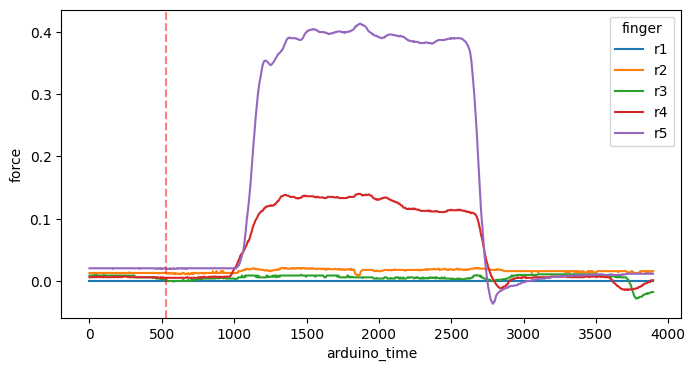

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

D = pd.read_csv('.././projects/finger_individuation/data/s101_01_trials_20250829_135547.csv')
data = pd.read_csv('.././projects/finger_individuation/data/s101_01_20250829_135546.csv')
TN = 1

# get the trial info:
force_center = D.force_center[D.TN==TN].values[0]
force_range = D.force_range[D.TN==TN].values[0]

rows = (data.TN == TN)
data_tr = data[rows].reset_index()
force_offset = [0., 0.04655022, 0.05359694, 0.06118613, 0.09567314]
data_tr[['r1', 'r2', 'r3', 'r4', 'r5']] = data_tr[['r1', 'r2', 'r3', 'r4', 'r5']]/1024
data_tr[['r1', 'r2', 'r3', 'r4', 'r5']] = data_tr[['r1', 'r2', 'r3', 'r4', 'r5']] - force_offset
long = data_tr.melt(id_vars=['arduino_time','state'],
                    value_vars=['r1', 'r2', 'r3', 'r4', 'r5'],
                    var_name='finger', value_name='force')
long['arduino_time'] = long['arduino_time'] - long['arduino_time'].values[0]
go_cue = np.where(long['state'] == "EXECUTION")[0][0]
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=long, x='arduino_time', y='force', hue='finger', ax=ax, dashes=False)
ax.axvline(x=long['arduino_time'].values[go_cue], color='r', linestyle='--', alpha=0.5)



